AFTER-POS-Tagging


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_path = '/content/drive/MyDrive/CSE499_DATASETS/csv/REDDIT-DATA-CLEAN-10K.csv'
counseldf = pd.read_csv(df_path)

In [4]:
print(counseldf.columns)

Index(['Unnamed: 0', 'post', 'topics', 'preprocesd_post'], dtype='object')


In [5]:
counseldf.head()

Unnamed: 0  ...                                    preprocesd_post
0           0  ...  do anyone else get anxious before take their c...
1           1  ...  help with anxietyinduce fear about school caus...
2           2  ...  use up what s leave and throw the rest away i ...
3           3  ...  my brain is drive me crazy i m a perfectionist...
4           4  ...  do anyone else feel like the bad person ever i...

[5 rows x 4 columns]

In [6]:
counseldf.drop(['Unnamed: 0','post'], axis = 1, inplace=True)
counseldf['post'] = counseldf['preprocesd_post']
counseldf.drop(['preprocesd_post'], axis = 1, inplace=True)
counseldf.head()

topics                                               post
0  anxiety  do anyone else get anxious before take their c...
1  anxiety  help with anxietyinduce fear about school caus...
2  anxiety  use up what s leave and throw the rest away i ...
3  anxiety  my brain is drive me crazy i m a perfectionist...
4  anxiety  do anyone else feel like the bad person ever i...

In [7]:
counseldf.head()

topics                                               post
0  anxiety  do anyone else get anxious before take their c...
1  anxiety  help with anxietyinduce fear about school caus...
2  anxiety  use up what s leave and throw the rest away i ...
3  anxiety  my brain is drive me crazy i m a perfectionist...
4  anxiety  do anyone else feel like the bad person ever i...

In [8]:
counseldf.shape

(9996, 2)

In [9]:
counseldf.isnull().sum()

topics    0
post      0
dtype: int64

In [10]:
counseldf = counseldf.dropna(axis=0)

In [11]:
counseldf.isnull().sum()

topics    0
post      0
dtype: int64

In [12]:
counseldf.shape

(9996, 2)

In [13]:
counseldf.drop_duplicates()
counseldf.shape

(9996, 2)

In [14]:
counseldf['topics'] = counseldf['topics'].str.split(',')
counseldf['topics'] = counseldf['topics'].apply(lambda x: x[0])

In [15]:
counseldf.head()

topics                                               post
0  anxiety  do anyone else get anxious before take their c...
1  anxiety  help with anxietyinduce fear about school caus...
2  anxiety  use up what s leave and throw the rest away i ...
3  anxiety  my brain is drive me crazy i m a perfectionist...
4  anxiety  do anyone else feel like the bad person ever i...

In [16]:
counseldf['topics'].value_counts()

suicidewatch     1666
ptsd             1666
socialanxiety    1666
anxiety          1666
depression       1666
mentalhealth     1666
Name: topics, dtype: int64

In [17]:
counseldf=counseldf[counseldf['topics'].str.contains('reddit')==False]
counseldf=counseldf[counseldf['topics'].str.contains('Sorry for making it so long')==False]
counseldf=counseldf[counseldf['topics'].str.contains('After college')==False]
counseldf=counseldf[counseldf['topics'].str.contains('I just want to share with you all how I am feeling. I have suffered from social anxiety from as long as I remember')==False]
counseldf=counseldf[counseldf['topics'].str.contains('Like i said i have been here for 6 months now')==False]
counseldf=counseldf[counseldf['topics'].str.contains('I have a good job here in the country i am living in now. However')==False]
counseldf=counseldf[counseldf['topics'].str.contains('As i said above i have regrets about missing out on things in college/school')==False]
counseldf=counseldf[counseldf['topics'].str.contains('This year')==False]

In [18]:
counseldf['topics'].value_counts()

suicidewatch     1666
ptsd             1666
socialanxiety    1666
anxiety          1666
depression       1666
mentalhealth     1666
Name: topics, dtype: int64

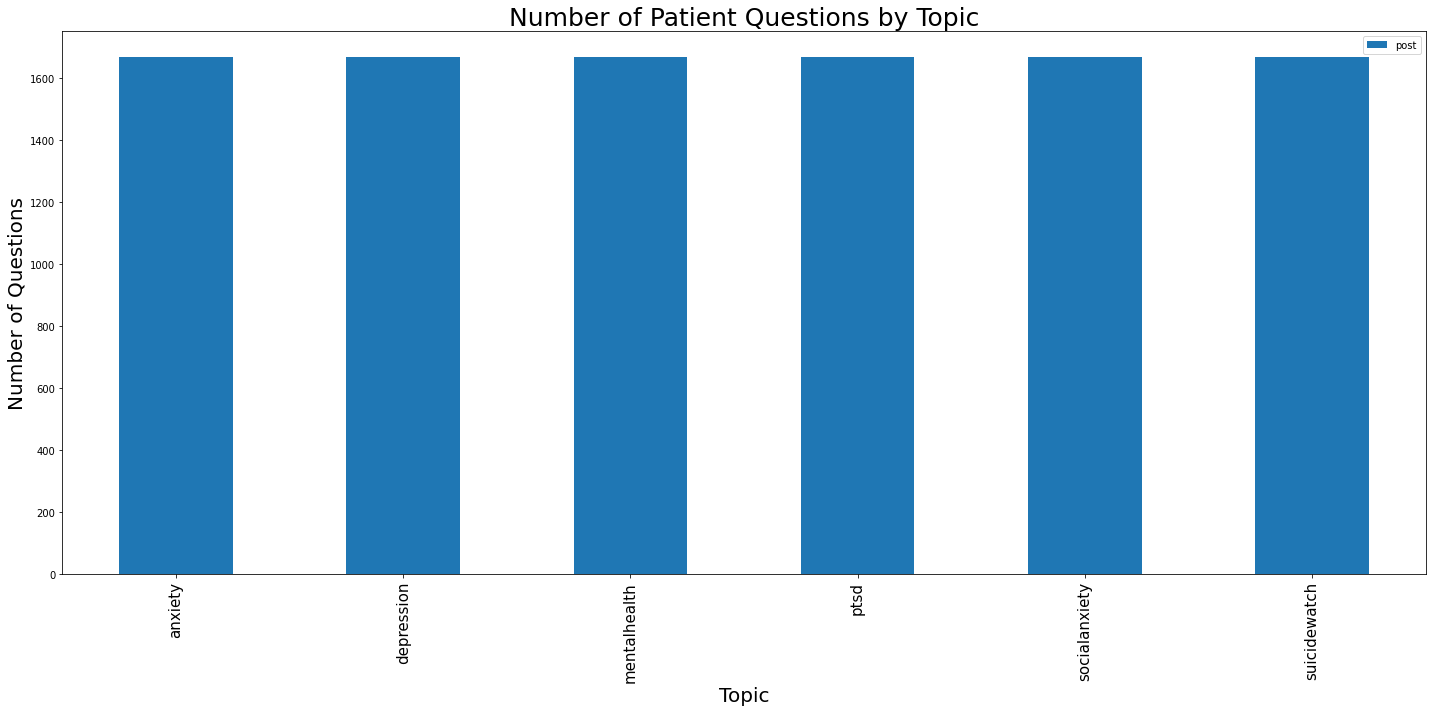

In [19]:
fig, ax = plt.subplots(figsize=(20, 10))
counseldf.groupby('topics').agg('count').sort_values('post', ascending=False).plot.bar(ax=ax)
ax.set_title("Number of Patient Questions by Topic", fontsize=25)
ax.set_ylabel("Number of Questions", fontsize=20)
ax.set_xlabel("Topic", fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
plt.tight_layout()
plt.show()

In [20]:
targetdf = pd.get_dummies(counseldf['topics'])
targetdf.head()

anxiety  depression  mentalhealth  ptsd  socialanxiety  suicidewatch
0        1           0             0     0              0             0
1        1           0             0     0              0             0
2        1           0             0     0              0             0
3        1           0             0     0              0             0
4        1           0             0     0              0             0

In [21]:
#Preprocess function


import nltk, re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter

stop_words = stopwords.words('english')
normalizer = WordNetLemmatizer()

def get_part_of_speech(word):
    probable_part_of_speech = wordnet.synsets(word)
    pos_counts = Counter()
    pos_counts["n"] = len(  [ item for item in probable_part_of_speech if item.pos()=="n"]  )
    pos_counts["v"] = len(  [ item for item in probable_part_of_speech if item.pos()=="v"]  )
    pos_counts["a"] = len(  [ item for item in probable_part_of_speech if item.pos()=="a"]  )
    pos_counts["r"] = len(  [ item for item in probable_part_of_speech if item.pos()=="r"]  )
    most_likely_part_of_speech = pos_counts.most_common(1)[0][0]
    return most_likely_part_of_speech

def preprocess_text(text):
    cleaned = re.sub(r'\W+', ' ', text).lower()
    tokenized = word_tokenize(cleaned)
    normalized = [normalizer.lemmatize(token, get_part_of_speech(token)) for token in tokenized]
    return normalized

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [22]:
counseldf['post'][0]

'do anyone else get anxious before take their car to the mechanics get to go tomorrow iaTMm scare that iaTMm go to have to do repair that cost a shitload of money hold me bah'

In [23]:
text = counseldf['post'][0]
cleaned = re.sub(r'\W+', ' ', text).lower()
print(cleaned)

do anyone else get anxious before take their car to the mechanics get to go tomorrow iatmm scare that iatmm go to have to do repair that cost a shitload of money hold me bah


In [24]:
tokenized = word_tokenize(cleaned)
print(tokenized)

['do', 'anyone', 'else', 'get', 'anxious', 'before', 'take', 'their', 'car', 'to', 'the', 'mechanics', 'get', 'to', 'go', 'tomorrow', 'iatmm', 'scare', 'that', 'iatmm', 'go', 'to', 'have', 'to', 'do', 'repair', 'that', 'cost', 'a', 'shitload', 'of', 'money', 'hold', 'me', 'bah']


In [25]:
normalized = [normalizer.lemmatize(token, get_part_of_speech(token)) for token in tokenized]
print(normalized)

['do', 'anyone', 'else', 'get', 'anxious', 'before', 'take', 'their', 'car', 'to', 'the', 'mechanic', 'get', 'to', 'go', 'tomorrow', 'iatmm', 'scare', 'that', 'iatmm', 'go', 'to', 'have', 'to', 'do', 'repair', 'that', 'cost', 'a', 'shitload', 'of', 'money', 'hold', 'me', 'bah']


In [26]:
processed_questionText = counseldf['post'].apply(lambda x: preprocess_text(x))

In [27]:
stop_words = set(stopwords.words('english'))

questionText_nostops = []
for title in processed_questionText:
    text_no_stops = [word for word in title if word not in stop_words]
    questionText_nostops.append(text_no_stops)

In [28]:
print(questionText_nostops[0])

['anyone', 'else', 'get', 'anxious', 'take', 'car', 'mechanic', 'get', 'go', 'tomorrow', 'iatmm', 'scare', 'iatmm', 'go', 'repair', 'cost', 'shitload', 'money', 'hold', 'bah']


In [29]:
import tensorflow as tf
from tensorflow.keras import preprocessing

tf.random.set_seed(4)
tf.__version__

'2.7.0'

In [30]:
tokenizer = preprocessing.text.Tokenizer(num_words=10000)
tokenizer.fit_on_texts( questionText_nostops ) 
tokenized_questions = tokenizer.texts_to_sequences( questionText_nostops ) 
print('Sample tokenized: {}'.format(tokenized_questions[0]))
print('==================================================================================================================\n')

length_list = list()
for token_seq in tokenized_questions:
    length_list.append( len( token_seq ))
max_input_length = np.array( length_list ).max()
print( 'Posts max length is {} words'.format( max_input_length ))
print('==================================================================================================================\n')

padded_questions = preprocessing.sequence.pad_sequences( tokenized_questions , maxlen=max_input_length , padding='post' )
input_data = np.array( padded_questions )
print( 'Input data shape -> {}\n'.format( input_data.shape ))
print('Input data sample->\n {}'.format(input_data[0]))
print('==================================================================================================================\n')

question_word_dict = tokenizer.word_index
num_question_tokens = len( question_word_dict )+1
print( 'Number of Question tokens = {}\n'.format( num_question_tokens))
print('Dictionary: {}'.format(question_word_dict))

Sample tokenized: [37, 74, 2, 143, 27, 257, 4130, 2, 4, 448, 24, 244, 24, 4, 2469, 1268, 6475, 264, 276, 2335]

Posts max length is 1077 words

Input data shape -> (9996, 1077)

Input data sample->
 [37 74  2 ...  0  0  0]

Number of Question tokens = 21315

Dictionary: {'feel': 1, 'get': 2, 'like': 3, 'go': 4, 'know': 5, 'think': 6, 'want': 7, 'time': 8, 'make': 9, 'would': 10, 'people': 11, 'really': 12, 'life': 13, 'anxiety': 14, 'even': 15, 'year': 16, 'thing': 17, 'help': 18, 'try': 19, 'friend': 20, 'day': 21, 'one': 22, 'say': 23, 'iatmm': 24, 'work': 25, 'bad': 26, 'take': 27, 'start': 28, 'talk': 29, 'tell': 30, 'well': 31, 'see': 32, 'never': 33, 'good': 34, 'much': 35, 'could': 36, 'anyone': 37, 'need': 38, 'something': 39, 'back': 40, 'way': 41, 'come': 42, 'anything': 43, 'always': 44, 'someone': 45, 'donatmt': 46, 'still': 47, 'happen': 48, 'live': 49, 'find': 50, 'long': 51, 'every': 52, 'also': 53, 'depression': 54, 'school': 55, 'since': 56, 'look': 57, 'end': 58, 'kee

In [31]:
import gensim.models.keyedvectors as word2vec #need to use due to depreceated model
import gensim.downloader as api
w2vModel = api.load('glove-wiki-gigaword-300') # this would download vector with 100 dimension

[==================================================] 100.0% 376.1/376.1MB downloaded


In [32]:
from keras.layers.embeddings import Embedding
# now lets connvert all the words we have in our data into vectors 
vector_size = 300
gensim_weight_matrix = np.zeros((num_question_tokens ,vector_size))
gensim_weight_matrix.shape

for word, index in tokenizer.word_index.items():
    if index < max_input_length: # since index starts with zero 
        if word in w2vModel.wv.vocab:
            gensim_weight_matrix[index] = w2vModel[word]
        else:
            gensim_weight_matrix[index] = np.zeros(300)

#%tensorflow_version 2.x
#import tensorflow as tf
#device_name = tf.test.gpu_device_name()
#if device_name != '/device:GPU:0' :
#  raise SystemError('GPU device not found')
#print('Found GPU at: {}'.format(device_name))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if __name__ == '__main__':


In [33]:
gensim_weight_matrix.shape

(21315, 300)

In [34]:
gensim_weight_matrix[13]# For The Word Life

array([-2.48220004e-02, -2.97760010e-01, -6.02289997e-02,  3.95249985e-02,
        1.34130001e-01, -9.61840004e-02, -3.85839999e-01, -5.49610019e-01,
       -6.28169999e-02, -1.82140005e+00,  3.95619988e-01, -3.38090003e-01,
       -1.19180001e-01,  2.07349993e-02, -2.53939986e-01, -4.66479987e-01,
        3.36459994e-01,  8.86280015e-02, -3.00599992e-01,  2.27699995e-01,
        8.53179954e-03,  7.36890018e-01, -1.68850005e-03,  5.17679989e-01,
        2.08130002e-01, -1.64489999e-01,  1.32620007e-01, -1.40739996e-02,
       -1.56489998e-01,  3.89319986e-01, -1.68350001e-03,  8.97119999e-01,
       -4.09189999e-01, -1.40009999e-01, -4.73569989e-01,  3.70319992e-01,
        8.52119997e-02, -1.81339994e-01, -8.45870003e-02, -1.06430002e-01,
        4.08910006e-01, -3.73019993e-01, -1.92139998e-01, -2.32889995e-01,
        1.63870007e-01, -8.43359996e-03,  5.61540015e-02,  7.69829988e-01,
        5.11900000e-02,  7.67629966e-02, -3.29719990e-01,  9.07120034e-02,
        2.39659995e-01,  

In [35]:
from keras.layers.embeddings import Embedding
# designing our architecture 
EMBEDDING_DIM = 300 # this means the embedding layer will create  a vector in 300 dimension
embedding_layer = Embedding(input_dim = num_question_tokens,# the whole vocabulary size 
                          output_dim = EMBEDDING_DIM, # vector space dimension
                          input_length= max_input_length, # max_len of text sequence
                          weights = [gensim_weight_matrix],trainable = False)

In [36]:
embedding_layer

In [37]:
!pip install keras-self-attention
import keras
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Activation, Conv2D, GlobalMaxPooling1D, GlobalAveragePooling1D,Flatten
from keras.layers import LSTM,Dropout,Bidirectional,GRU
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.callbacks import ModelCheckpoint
from keras import backend as K
from keras_self_attention import SeqSelfAttention


#Model For BiLSTM + Attention (first)
inputs = tf.keras.layers.Input(shape=(max_input_length,))
embedding_sequence = embedding_layer(inputs)

  Created wheel for keras-self-attention: filename=keras_self_attention-0.50.0-py3-none-any.whl size=19414 sha256=de42d7edbe10dd55d72aa8b68298222377113b1d9a192e7418e04f10bef28809
  Stored in directory: /root/.cache/pip/wheels/92/7a/a3/231bef5803298e7ec1815215bc0613239cb1e9c03c57b13c14
Successfully built keras-self-attention


In [38]:
print(embedding_sequence)

KerasTensor(type_spec=TensorSpec(shape=(None, 1077, 300), dtype=tf.float32, name=None), name='embedding/embedding_lookup/Identity_1:0', description="created by layer 'embedding'")


#BEFORE POST TAG

In [39]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#nltk
import nltk

#stop-words
from nltk.corpus import stopwords
stop_words=set(nltk.corpus.stopwords.words('english'))

# tokenizing
from nltk import word_tokenize,sent_tokenize

#keras
import keras
from keras.preprocessing.text import one_hot,Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense , Flatten ,Embedding,Input
from keras.models import Model

In [40]:
corp=counseldf['post']
no_docs=len(corp)
print(no_docs)

9996


In [41]:
vocab_size=50
encod_corp=[]
for i,doc in enumerate(corp):
    encod_corp.append(one_hot(doc,50))
    print("The encoding for document",i+1," is : ",one_hot(doc,50))

Streaming output truncated to the last 5000 lines.
The encoding for document 4997  is :  [48, 23, 19, 49, 43, 32, 29, 11, 40, 10, 22, 17, 47, 21, 9, 23, 32, 8, 47, 48, 3, 21, 13, 41, 17, 43, 10, 47, 48, 16, 10, 6, 7, 47, 40, 31, 14, 40, 48, 17, 17, 48, 47, 31, 45, 38, 19, 6, 38, 40, 7, 38, 4, 47, 20, 47, 5, 44, 23, 5, 10, 22, 46, 31, 40, 47, 47, 21, 15, 41, 6, 29, 41, 34, 37, 36, 48, 23, 23, 34, 46, 33, 31, 4, 48, 31, 31, 34, 30, 48, 41, 47, 27, 41, 35, 44, 8, 9, 20, 43, 36, 34, 30, 47, 21, 31, 23, 32, 3, 2, 48, 16, 40, 48, 47, 32, 47, 47, 43, 49, 26, 28, 16, 14, 10, 43, 5, 48, 18, 9, 5, 21, 20, 31, 49, 16, 33, 2, 19, 49, 30, 39, 4, 49, 39, 49, 16, 28, 32, 14]
The encoding for document 4998  is :  [8, 7, 41, 46, 47, 40, 48, 37, 17, 41, 30, 35, 28, 15, 41, 47, 38, 48, 47, 30, 31, 15, 28, 8, 4, 18, 47, 31, 36, 18, 38, 9, 42, 48, 39, 12, 30, 39, 9, 21, 47, 38, 9, 4, 16, 6, 44, 40, 47, 25, 34, 6, 48, 8, 3, 18, 2, 47, 28, 49, 37, 41, 42, 1, 47, 38, 40, 6, 48, 14, 48, 17, 6, 4, 38, 37, 30, 4

In [42]:
# length of maximum document. will be nedded whenever create embeddings for the words
maxlen=-1
for doc in corp:
    tokens=nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen=len(tokens)
print("The maximum number of words in any document is : ",maxlen)

The maximum number of words in any document is :  2621


In [43]:
    # now to create embeddings all of our docs need to be of same length. hence we can pad the docs with zeros.
pad_corp=pad_sequences(encod_corp,maxlen=maxlen,padding='post',value=0.0)
print("No of padded documents: ",len(pad_corp))

No of padded documents:  9996


In [44]:
for i,doc in enumerate(pad_corp):
     print("The padded encoding for document",i+1," is : ",doc)

Streaming output truncated to the last 5000 lines.
The padded encoding for document 4997  is :  [48 23 19 ...  0  0  0]
The padded encoding for document 4998  is :  [ 8  7 41 ...  0  0  0]
The padded encoding for document 4999  is :  [47 37 11 ...  0  0  0]
The padded encoding for document 5000  is :  [46 47 27 ...  0  0  0]
The padded encoding for document 5001  is :  [28 49 12 ...  0  0  0]
The padded encoding for document 5002  is :  [40  4 37 ...  0  0  0]
The padded encoding for document 5003  is :  [27 43 29 ...  0  0  0]
The padded encoding for document 5004  is :  [47 48  8 ...  0  0  0]
The padded encoding for document 5005  is :  [32 49 48 ...  0  0  0]
The padded encoding for document 5006  is :  [47 13 49 ...  0  0  0]
The padded encoding for document 5007  is :  [12 48 23 ...  0  0  0]
The padded encoding for document 5008  is :  [32 48 48 ...  0  0  0]
The padded encoding for document 5009  is :  [45 44 49 ...  0  0  0]
The padded encoding for document 5010  is :  [47 40 

In [45]:
# specifying the input shape
input=Input(shape=(no_docs,maxlen),dtype='float64')

In [46]:
'''
shape of input. 
each document has 12 element or words which is the value of our maxlen variable.

'''
word_input=Input(shape=(maxlen,),dtype='float64')  

# creating the embedding
word_embedding=Embedding(input_dim=vocab_size,output_dim=300,input_length=maxlen)(word_input)

word_vec=Flatten()(word_embedding) # flatten
embed_model =Model([word_input],word_vec) # combining all into a Keras model

In [47]:
embed_model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-3),loss='binary_crossentropy',metrics=['acc']) 
# compiling the model. parameters can be tuned as always.

In [48]:
print(type(word_embedding))
print(word_embedding)

<class 'keras.engine.keras_tensor.KerasTensor'>
KerasTensor(type_spec=TensorSpec(shape=(None, 2621, 300), dtype=tf.float32, name=None), name='embedding_1/embedding_lookup/Identity_1:0', description="created by layer 'embedding_1'")


In [49]:
print(embed_model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 2621)]            0         
                                                                 
 embedding_1 (Embedding)     (None, 2621, 300)         300000    
                                                                 
 flatten (Flatten)           (None, 786300)            0         
                                                                 
Total params: 300,000
Trainable params: 300,000
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
embeddings=embed_model.predict(pad_corp)

In [ ]:
print("Shape of embeddings : ",embeddings.shape)


In [ ]:
print("Shape of embeddings : ",embeddings.shape)
print(embeddings)